In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_test.shape

(10000,)

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.matshow(X[index])
    plt.xlabel(y[index])

<Figure size 1500x200 with 0 Axes>

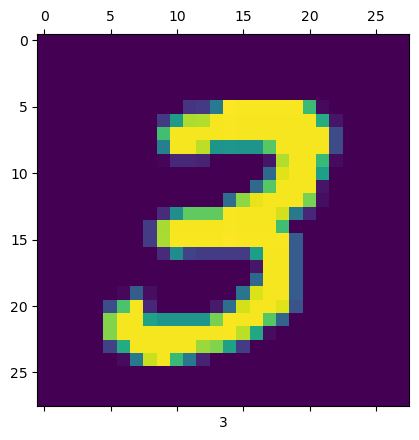

In [10]:
plot_sample(X_train,y_train,7)

In [ ]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
inpx = (1, img_rows, img_cols)

else:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [11]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [26]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [27]:
cnn_model.fit(X_train,y_train,epochs=10)

Epoch 1/10


ValueError: Input 0 of layer "conv2d_14" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (32, 28, 28)